In [ ]:
# Homework # 5 Neural Network

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop a Machine learning model for ANN based customer Churn Prediction using simple neural network. 

### Dataset - Churn dataset 

Churn prediction is the process of forecasting which customers are likely to discontinue using a service or subscription.
It's essentially identifying customers at risk of leaving, allowing businesses to take proactive steps to retain them. 

### Student - Huy Le

### Problem
### Data Exploration: Understanding the dataset and key features.
### Data Preprocessing: Cleaning the data, handling missing values, and normalizing features.
### Modeling: Implementing and evaluating machine learning model - Decision Tree
### Evaluation: Evaluate the performance of the model.

In [ ]:
# Step 1 - Import libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [4]:
# Step 2 – Import data

In [6]:
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"  # make sure this file is in the same folder

df = pd.read_csv(file_path)

display(df.head())

print("Dataset info:")
df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [ ]:
## Step 3 – Data Exploration

In [ ]:
## Describe

In [7]:
# Describe data
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762
std,0.369,24.559,30.090
min,0.000,0.000,18.250
25%,0.000,9.000,35.500
50%,0.000,29.000,70.350
75%,0.000,55.000,89.850
max,1.000,72.000,118.750


In [8]:
# Check the target distribution
print("`Churn` value counts:")
print(df["Churn"].value_counts())
print("`Churn` value normalized counts:")
print(df["Churn"].value_counts(normalize=True))

`Churn` value counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
`Churn` value normalized counts:
Churn
No    0.735
Yes   0.265
Name: proportion, dtype: float64


In [ ]:
## Distribution

C:\Users\micro\AppData\Local\Temp\ipykernel_25304\1073306578.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)
C:\Users\micro\AppData\Local\Temp\ipykernel_25304\1073306578.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True)
C:\Users\micro\AppData\Local\T

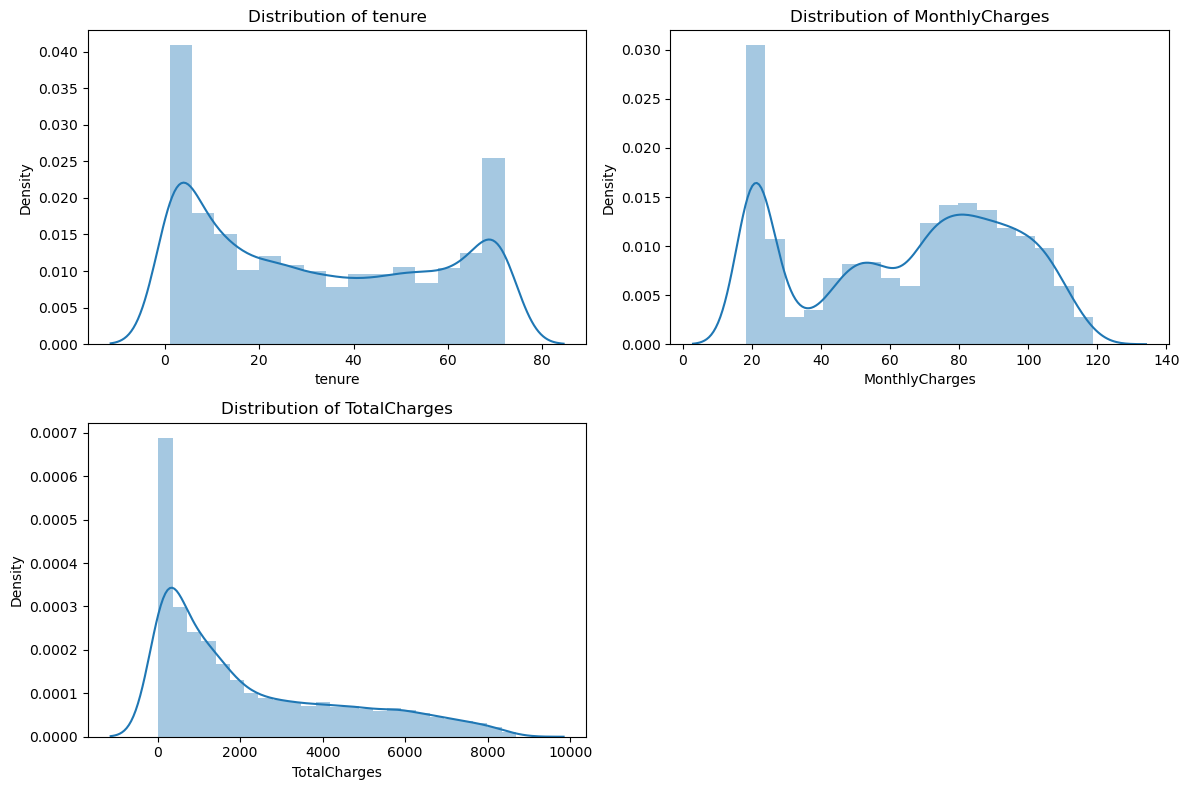

In [11]:
# I plot each distribution to see each feature and how they are distributed.
numeric_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

# Clean TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows where TotalCharges is NaN
df.dropna(subset=["TotalCharges"], inplace=True)

plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.distplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [ ]:
## Step 4 – Data Cleaning

In [ ]:
## Drop insignificant data

In [12]:
df.drop(columns=["customerID"], inplace=True)

In [13]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [14]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
## Label encoding

In [15]:
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])

In [ ]:
# Separate features (X) and target (y)

In [16]:
# Separate features (X) and target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [18]:
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

print("Categorical columns:")
print(cat_cols)

print("Numeric columns:")
print(num_cols)

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

Categorical columns:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], dtype='object')
Numeric columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [21]:
## Step 6 – Train/Test Split (80:20)

### Split the data into:
### - 80% training set
### - 20% testing set

In [25]:
# Step 6 - Train/Test Split and Feature Scaling

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.20,
    random_state=42,
    shuffle=True
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Check the actual ratio
total = len(df)
train_pct = len(X_train) / total * 100
test_pct = len(X_test) / total * 100

print(f"\nTraining set: {train_pct:.2f}%")
print(f"Testing set : {test_pct:.2f}%")

# Scale features
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Training set shape: (5625, 30)
Testing set shape: (1407, 30)

Training set: 79.99%
Testing set : 20.01%


In [26]:
X_train_scaled

array([[-0.43758982,  0.43467403, -0.51862031, ..., -0.52764485,
        -0.71475753, -0.54742719],
       [-0.43758982, -1.19565249, -0.3744434 , ...,  1.89521417,
        -0.71475753, -0.54742719],
       [-0.43758982,  0.92377199,  0.43261589, ..., -0.52764485,
         1.39907586, -0.54742719],
       ...,
       [-0.43758982, -0.95110351,  0.5453059 , ..., -0.52764485,
         1.39907586, -0.54742719],
       [-0.43758982,  0.71998118, -1.48974299, ..., -0.52764485,
        -0.71475753, -0.54742719],
       [ 2.28524509, -0.50276372,  0.29672501, ..., -0.52764485,
         1.39907586, -0.54742719]])

In [27]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000
mean,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.438,-1.277,-1.539,-0.996,-1.014,-0.962,-0.654,-3.041,-0.329,-0.846,-0.885,-0.530,-0.530,-0.635,-0.530,-0.728,-0.530,-0.722,-0.530,-0.639,-0.530,-0.793,-0.530,-0.802,-0.518,-0.561,-1.203,-0.528,-0.715,-0.547
25%,-0.438,-0.951,-0.978,-0.829,-1.014,-0.962,-0.654,0.329,-0.329,-0.846,-0.885,-0.530,-0.530,-0.635,-0.530,-0.728,-0.530,-0.722,-0.530,-0.639,-0.530,-0.793,-0.530,-0.802,-0.518,-0.561,-1.203,-0.528,-0.715,-0.547
50%,-0.438,-0.136,0.187,-0.392,0.986,-0.962,-0.654,0.329,-0.329,-0.846,-0.885,-0.530,-0.530,-0.635,-0.530,-0.728,-0.530,-0.722,-0.530,-0.639,-0.530,-0.793,-0.530,-0.802,-0.518,-0.561,0.831,-0.528,-0.715,-0.547
75%,-0.438,0.924,0.835,0.659,0.986,1.039,1.530,0.329,-0.329,1.183,1.129,-0.530,-0.530,1.574,-0.530,1.373,-0.530,1.385,-0.530,1.566,-0.530,1.262,-0.530,1.247,-0.518,-0.561,0.831,-0.528,1.399,-0.547
max,2.285,1.617,1.792,2.830,0.986,1.039,1.530,0.329,3.041,1.183,1.129,1.887,1.887,1.574,1.887,1.373,1.887,1.385,1.887,1.566,1.887,1.262,1.887,1.247,1.929,1.782,0.831,1.895,1.399,1.827


In [ ]:
# Step 7 - Build the ANN model

In [28]:
input_dim = X_train_scaled.shape[1]

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=input_dim))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary output (churn: 0/1)

model.summary()

C:\ProgramData\anaconda3\envs\my-env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Step 8 - Compile and train the model

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7071 - loss: 0.5694 - val_accuracy: 0.7307 - val_loss: 0.4901
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7736 - loss: 0.4623 - val_accuracy: 0.7973 - val_loss: 0.4297
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7907 - loss: 0.4371 - val_accuracy: 0.8000 - val_loss: 0.4174
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7938 - loss: 0.4297 - val_accuracy: 0.8018 - val_loss: 0.4126
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 0.4252 - val_accuracy: 0.8062 - val_loss: 0.4100
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7998 - loss: 0.4212 - val_accuracy: 0.8124 - val_loss: 0.4068
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8004 - loss: 0.4178 - val_accuracy: 0.8124 - val_loss: 0.4062
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8058 - loss: 0.4149 - val_accuracy: 0.

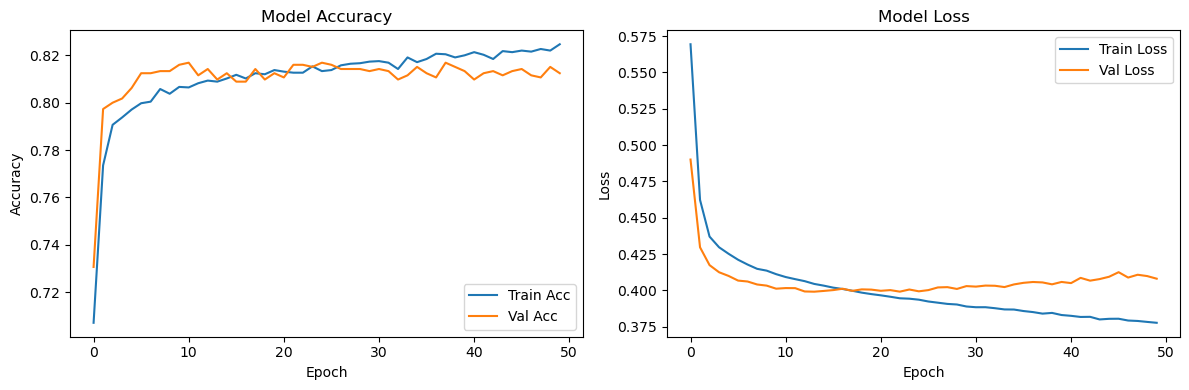

In [30]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
# Step 9 - Evaluate on test data

In [32]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss: 0.4611
Test Accuracy: 0.7790


In [33]:
y_pred = model.predict(X_test_scaled)
y_pred = y_pred.argmax(axis=-1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7341862117981521

In [35]:
f1 = f1_score(y_test, y_pred)

In [36]:
print(f"F1 Score : {f1:.4f}")

F1 Score : 0.0000


In [37]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[1033    0]
 [ 374    0]]


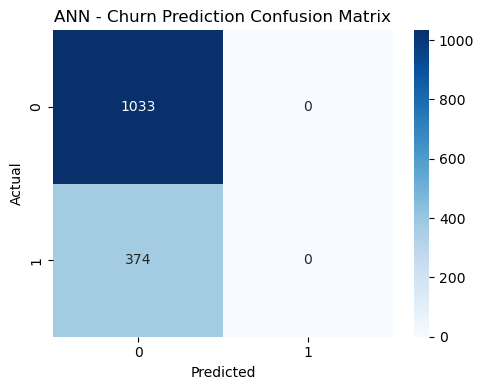

In [38]:
# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("ANN - Churn Prediction Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [39]:
sample = X_test.iloc[[0]]
sample_scaled = sc.transform(sample) 

sample_prob = model.predict(sample_scaled)[0][0]
sample_pred = int(sample_prob > 0.5)

print("Sample customer features:")
display(sample)

print(f"\nPredicted churn probability: {sample_prob:.4f}")
print("Predicted class (0 = No, 1 = Yes):", sample_pred)
print("Actual class:", y_test.iloc[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Sample customer features:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2481,1,61,25.000,1501.750,True,True,False,True,False,True,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,False,False



Predicted churn probability: 0.0124
Predicted class (0 = No, 1 = Yes): 0
Actual class: 0
